In [48]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
from skimage.io import imread, imshow
from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('./Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Analysis

In [3]:
# Delete CustomerID
dataset=dataset.drop('CustomerID',axis=1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

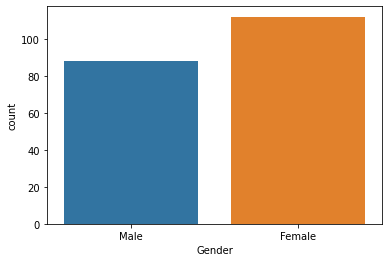

In [4]:
#Check man - woman count
sns.countplot(x='Gender',data=dataset)
#Little bit more woman than man

<AxesSubplot:title={'center':'Spending_Score'}, xlabel='Gender'>

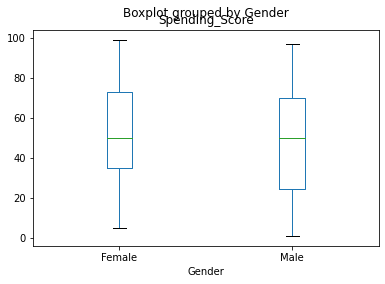

In [5]:
dataset.boxplot(by ='Gender', column =['Spending_Score'], grid = False) 
#Seems like woman spend a bit more money, but not huge amount

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

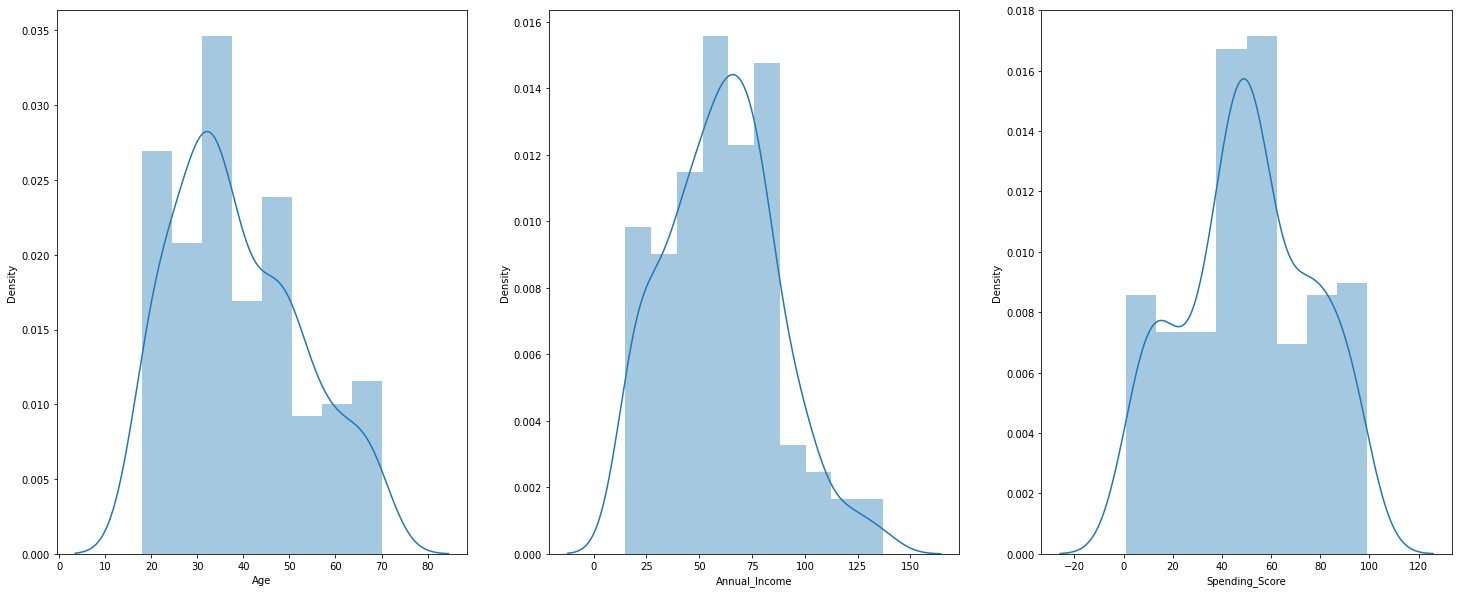

In [6]:
# Distribution of Age, Income and Spending_Score
fig, ax = plt.subplots(1,3)
fig.set_figwidth(25)
fig.set_figheight(10)
sns.distplot(dataset['Age'],ax=ax[0])
sns.distplot(dataset['Annual_Income'],ax=ax[1])
sns.distplot(dataset['Spending_Score'],ax=ax[2])

#Spending score has normal distribution
#Age and Anual income are more right skewed 

In [7]:
#Change female and male to 0 and 1
dataset=dataset.replace(to_replace=['Female', 'Male'], value=[0, 1])

# Clustering


Lets start with checking how we can cluster based on the relation between Age and SpencingScore

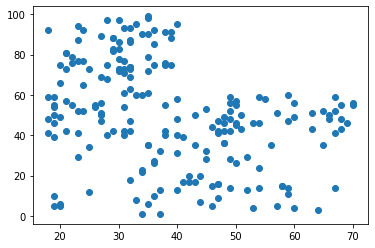

In [28]:
# show scatter of Age and Spending_Score
plt.scatter(dataset['Age'], dataset['Spending_Score'])
plt.show()
#3 clusters
X=dataset[['Age','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)


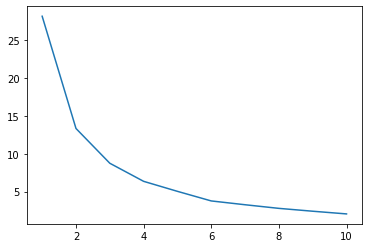

In [9]:
# Lets use the elbow method to determine ideal number of clusters
err = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(X)
    err.append(kmeans.inertia_)
    
plt.plot(range(1, 11), err)
plt.show()

#6 - 8 seems fine here, after that our error doesn't really go down anymore

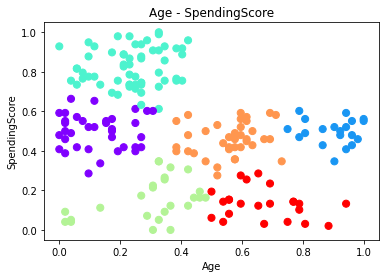

In [17]:
#KMeans
est = KMeans(6)
est.fit(X)
y_kmeans = est.predict(X)
plt.title("Age - SpendingScore")
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

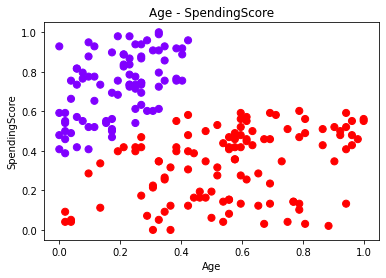

In [14]:
#MEANSHIFT
bandwidth = estimate_bandwidth(X) #This is not 100% accurate but is a good start to determine bandwith
est = MeanShift(bandwidth=bandwidth)
est.fit(X)
labels = est.predict(X)
plt.title("Age - SpendingScore")
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow')

#Here we see it only gives 2 clusters, doesn't seem optimal here

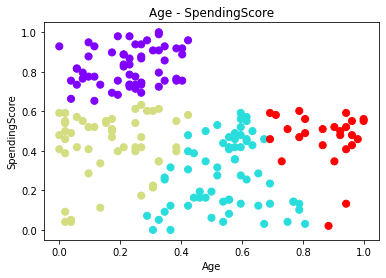

In [16]:
#MEANSHIFT
#Based on the results above we can manually lower the bandwith to get more clusters
#Let's lower it by 0.1
bandwidth = estimate_bandwidth(X)
est = MeanShift(bandwidth=bandwidth-0.1)
est.fit(X)
labels = est.predict(X)
plt.title("Age - SpendingScore")
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow')

#By lowering the bandwith we can now spot 4 different clusters

THOUGHTS: With the young people there are spenders in all categories (low, medium, high). For the older people we don't see any high spending habits (only medium to low)

Now we can continue with checking how we can cluster based on the relation between Annual Income and SpencingScore

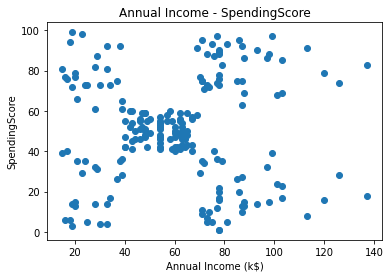

In [32]:
# Clustering Annual_Income en Spending_Score
plt.title("Annual Income - SpendingScore")
plt.xlabel("Annual Income (k$)")
plt.ylabel("SpendingScore")
plt.scatter(dataset['Annual_Income'], dataset['Spending_Score'])
plt.show()
#5 clusters
X=dataset[['Annual_Income','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [50]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

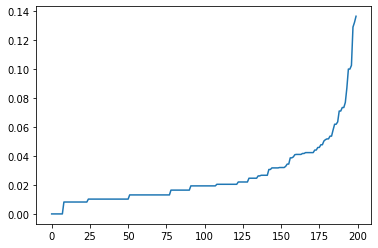

In [51]:
#Deciding esp with k nearest neighbors method
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

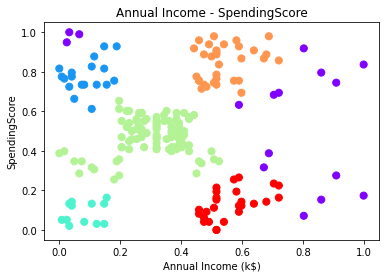

In [67]:
#DBSCAN
#esp = max distance between points to be considerd a neighbour
est = DBSCAN(eps=0.09, min_samples=5) #
labels = est.fit_predict(X)
plt.title("Annual Income - SpendingScore")
plt.xlabel("Annual Income (k$)")
plt.ylabel("SpendingScore")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow');

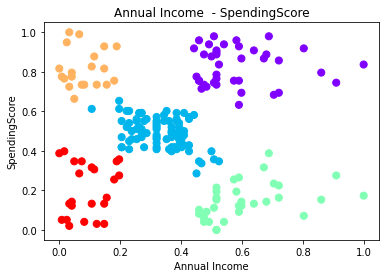

In [35]:
# AgglomerativeClustering
#Based on the original plot we could manually spot 5 clusters so n_clusters=5
est = AgglomerativeClustering(
    n_clusters=5)
labels = est.fit_predict(X)
plt.title("Annual Income  - SpendingScore")
plt.xlabel("Annual Income")
plt.ylabel("SpendingScore")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow');

THOUGHTS: When just looking at the original plot we could spot 5 clusters. Both DBSCAN and AgglomerativeClustering found 5 clusters (DBSCAN with some outliers). 

We have 2 clusters that have low income, 1 of them has low spending and 1
has surprising high spending.

1 cluster is very centered, Medium income with medium spending

2 clusters for high income with 1 high spending and 1 surprising low
spending.

The 3 cluster with middle to high spending could be possible target groups for a supermarket

We can also combine  Age, Annual_Income and Spending_Score to make 3d clusters

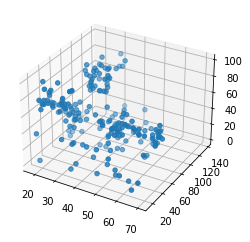

In [83]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset['Age'],dataset['Annual_Income'],dataset['Spending_Score'])
plt.show()
X=dataset[['Age','Annual_Income','Spending_Score']]
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

#We can see couple of clusters already
#cluster young people with high income and who spend a lot
#cluster young people with low income and who spend a lot
#cluster middle age people with high income and who have low spending

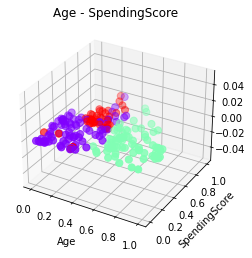

In [84]:
from sklearn.cluster import KMeans
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
bandwidth = estimate_bandwidth(X)
est = MeanShift(bandwidth=bandwidth-0.1)
est.fit(X)
labels = est.predict(X)
plt.title("Age - SpendingScore")
plt.xlabel("Age")
plt.ylabel("SpendingScore")
ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow')
#We can see MEANSHIFT finds 3 clusters in this case